# The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

In [156]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x2653fa678f0>)

There are 6 star types that are encoded in the 'Star type' column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

In [157]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


We've seen this already last time. It is often good practice to start with a statistical analysis of the dataset to answer the following questions:

- Are there any missing values?
- Are there NaNs in the data?

Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:

<center>
    <img src="https://github.com/Alice-Palladino/astrostatistics_bicocca_2024/blob/main/working/HR_diagram.png?raw=true" alt="HR diagram" width="500">
</center>

We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

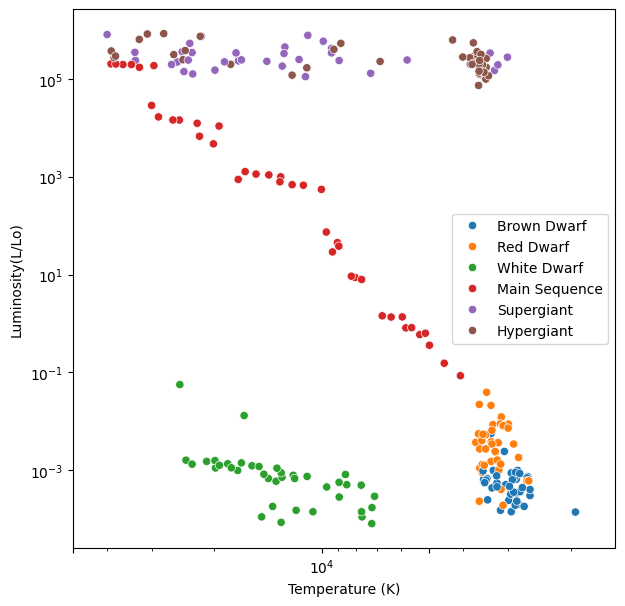

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

## Tasks

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two.
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

This is actually a very important lesson in machine learning: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is the usual machine-learning approach) standardize your data such that each dimension has mean=0 and variance=1.
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?

### For later:

- Now run a supervised classification algorithm on this dataset.
- Can you predict the stellar type? How well? Careful with overfitting of course.

## PCA with original dataset

In [160]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.ticker import PercentFormatter

In [161]:
X = df_stars.to_numpy()

temperature = np.array(X[:, 0], dtype = float)
luminosity = np.array(X[:, 1], dtype = float)
radius = np.array(X[:, 2], dtype = float)
magnitude = np.array(X[:, 3], dtype = float)

#star_type = np.array(X[:, 4])
#color = np.array(X[:, 5])
#sp_class = np.array(X[:, 6])

data = np.column_stack((temperature, luminosity, radius, magnitude))

In [162]:
pca = PCA(n_components=2)
components = pca.fit_transform(data)

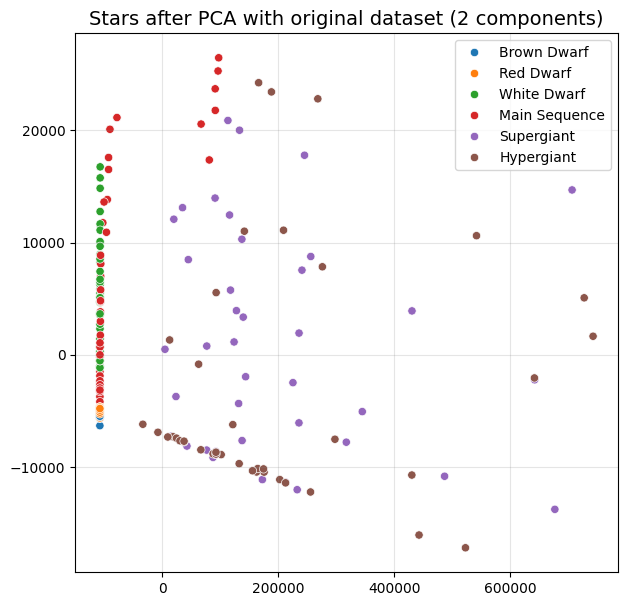

In [163]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=labels)
plt.title('Stars after PCA with original dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

As expected, this first plot is terrible. 

## PCA with transformed set

I want to use a linear transformation so that every dimension goes from $-1$ to $1$.

In [164]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
sca_components = pca.fit_transform(scaled_data) 

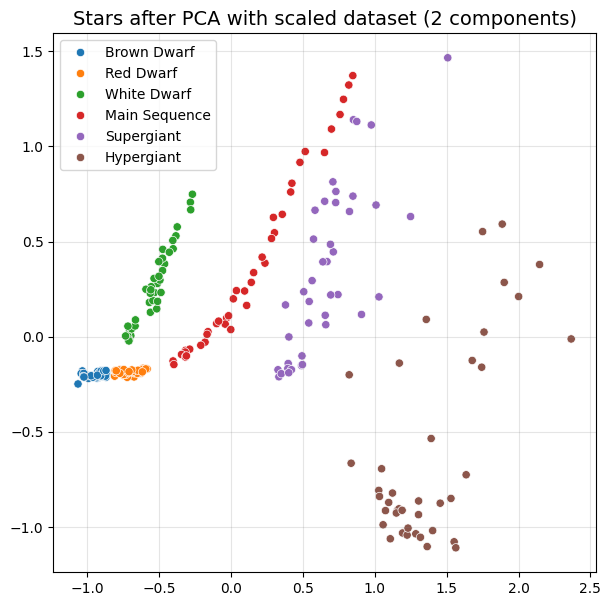

In [165]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=sca_components[:,0], y=sca_components[:,1], hue=labels)
plt.title('Stars after PCA with scaled dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

This is much better! Each type is well isolated from the others; dwarf stars are particularly well-clustered, while super- and hypergiants are more scattered, but still not mixed with other stars.

I want to know how much variance is encapsulated in each eigenvalue:

In [166]:
evals_scaled = pca.explained_variance_ratio_ 
for i, v in enumerate(evals_scaled):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_scaled)[i]*100))

In the 1° eigenvalue is encapsulated 63.8% of the variance (cumulative variance: 63.8%)
In the 2° eigenvalue is encapsulated 21.4% of the variance (cumulative variance: 85.2%)


Out of curiosity, I want to check the variance of 4 components:

In the 1° eigenvalue is encapsulated 63.8% of the variance (cumulative variance: 63.8%)
In the 2° eigenvalue is encapsulated 21.4% of the variance (cumulative variance: 85.2%)
In the 3° eigenvalue is encapsulated 8.4% of the variance (cumulative variance: 93.6%)
In the 4° eigenvalue is encapsulated 6.4% of the variance (cumulative variance: 100.0%)


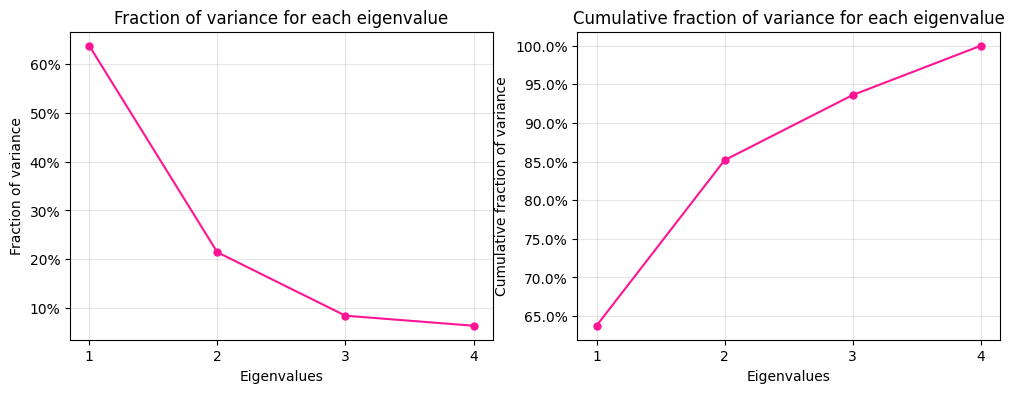

In [167]:
pca = PCA(n_components=4)
components = pca.fit_transform(scaled_data) 
evals_scaled = pca.explained_variance_ratio_ 

for i, v in enumerate(evals_scaled):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_scaled)[i]*100))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xgrid = np.arange(len(evals_scaled))+1

ax[0].plot(xgrid, evals_scaled, marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[0].grid(c='grey', alpha = 0.2)
ax[0].set_xlabel('Eigenvalues')
ax[0].set_xticks(xgrid)
ax[0].set_ylabel('Fraction of variance')
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[0].set_title('Fraction of variance for each eigenvalue')

ax[1].plot(xgrid, np.cumsum(evals_scaled), marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[1].grid(c='grey', alpha = 0.2)
ax[1].set_xlabel('Eigenvalues')
ax[1].set_xticks(xgrid)
ax[1].set_ylabel('Cumulative fraction of variance')
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].set_title('Cumulative fraction of variance for each eigenvalue')

plt.show()

## PCA with standardized set

I want to try withening the dataset to see if the results are much different.

In [168]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
std_components = pca.fit_transform(std_data)

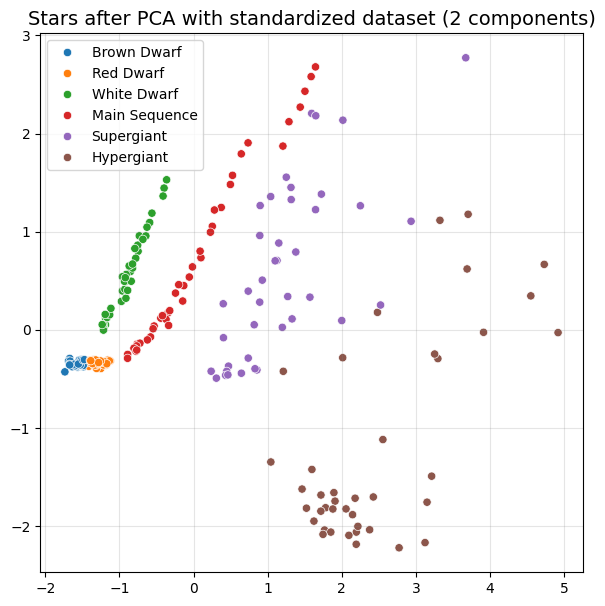

In [169]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=std_components[:,0], y=std_components[:,1], hue=labels)
plt.title('Stars after PCA with standardized dataset (2 components)', fontsize = 14)
plt.grid(c='grey', alpha = 0.2)
plt.show()

In [170]:
evals_std = pca.explained_variance_ratio_ 
for i, v in enumerate(evals_std):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_std)[i]*100))

In the 1° eigenvalue is encapsulated 60.4% of the variance (cumulative variance: 60.4%)
In the 2° eigenvalue is encapsulated 23.5% of the variance (cumulative variance: 83.9%)


It looks very similar to the scaled pca. 

With 4 components:

In the 1° eigenvalue is encapsulated 60.4% of the variance (cumulative variance: 60.4%)
In the 2° eigenvalue is encapsulated 23.5% of the variance (cumulative variance: 83.9%)
In the 3° eigenvalue is encapsulated 9.3% of the variance (cumulative variance: 93.2%)
In the 4° eigenvalue is encapsulated 6.8% of the variance (cumulative variance: 100.0%)


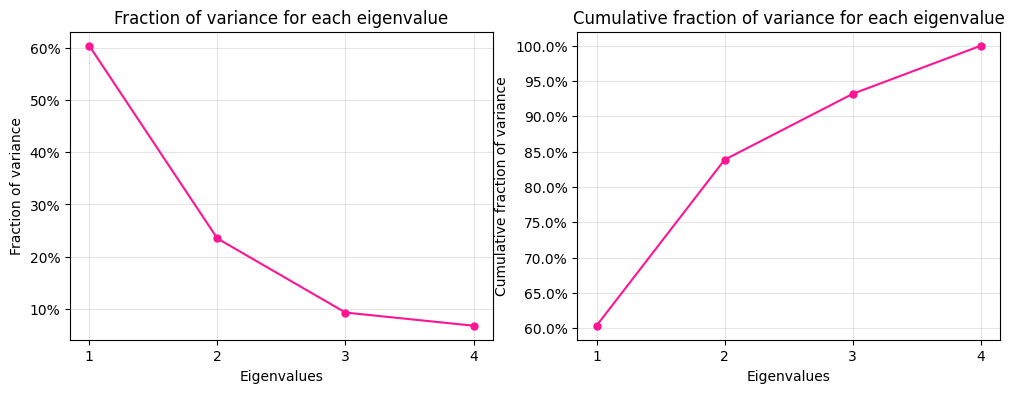

In [171]:
pca = PCA(n_components=4)
std_components = pca.fit_transform(std_data) 
evals_std = pca.explained_variance_ratio_ 

for i, v in enumerate(evals_std):
    print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_std)[i]*100))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xgrid = np.arange(len(evals_std))+1

ax[0].plot(xgrid, evals_std, marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[0].grid(c='grey', alpha = 0.2)
ax[0].set_xlabel('Eigenvalues')
ax[0].set_xticks(xgrid)
ax[0].set_ylabel('Fraction of variance')
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[0].set_title('Fraction of variance for each eigenvalue')

ax[1].plot(xgrid, np.cumsum(evals_std), marker = 'o', markersize = 5, ls = '-', color = 'deeppink')
ax[1].grid(c='grey', alpha = 0.2)
ax[1].set_xlabel('Eigenvalues')
ax[1].set_xticks(xgrid)
ax[1].set_ylabel('Cumulative fraction of variance')
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].set_title('Cumulative fraction of variance for each eigenvalue')

plt.show()

### Comparing the results

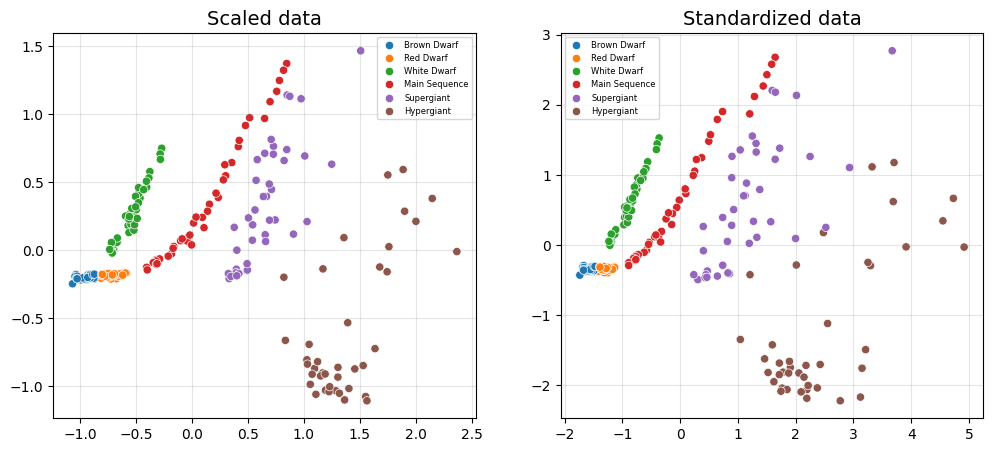

% of variance explained by each eigenvalue:

	Scaled data	Standardized data
1° 	63.8% 		60.4% 
2° 	21.4% 		23.5% 
3° 	8.4% 		9.3% 
4° 	6.4% 		6.8% 


In [177]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=sca_components[:,0], y=sca_components[:,1], hue=labels, ax=ax[0])
ax[0].set_title('Scaled data', fontsize = 14)
ax[0].grid(c='grey', alpha = 0.2)
ax[0].legend(fontsize=6)

sns.scatterplot(x=std_components[:,0], y=std_components[:,1], hue=labels, ax=ax[1])
ax[1].set_title('Standardized data', fontsize = 14)
ax[1].grid(c='grey', alpha = 0.2)
ax[1].legend(fontsize=6)

plt.show()

print('% of variance explained by each eigenvalue:\n')
print('\tScaled data\tStandardized data')
for i, sc, st in zip(np.arange(len(evals_scaled)), evals_scaled, evals_std):
    print("%i° \t%.1f%% \t\t%.1f%% " % (i+1, sc*100, st*100))
    #print("In the %i° eigenvalue is encapsulated %.1f%% of the variance (cumulative variance: %.1f%%)" % (i+1, v*100, np.cumsum(evals_std)[i]*100))



As shown in this summary, for the scaled data the first component explains more variance than for the standardized data. This is particularly visible for the super- and hypergiants, where the y axis is roughly the same for both plots, while the values on the x axis are different; as a consequence, for the standardized data, the limit between super- and hypergiants is less defined. 

I suspect this is because standardizing the data forces each dimension to have the same variance, while simply scaling them gives different variances for each dimension; this influences the PCA results. 